### PROBLEM STATEMENT

There are various factors that affect customer’s policy purchase decisions in addition to the vast number of channels - digital or otherwise. In this hackathon we want you to:

1.Create segments of customers based on their persona. The segments should be defined clearly and should not be too similar to each other,

2.Evaluate weightage of product features for each of the customer segments created,

3.Create a recommender systems (statistical based model or algorithm) to find the attributes influencing the customer’s preference for product features

4.Identify effect of market factors affecting these segments
The model needs to be specific to Indian life insurance market, hence, if you are using any data from public sources, ensure that it is relevant to India market.

### About the data set (Insurance data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**AGE:** Age of customer when policy is bought

**EDUCATION:** Education of customer:higher_secondary, graduate_plus

**OCC:** Occupation of customer (professional are Doctors, CA), business is Self-employed: business, salaried_govt, professional Number of miles of daily commute for the employee

**PINCODE:** Customer residence pincode

**PROD_CATEGORY:** Product Type (ulip - Market linked insurance policy, trad - non-market linked policy, term - term product)

**INCOME_SEGMENT** Customer Income segment(1 to 10; 1 - lower income segment, 10 - higher income segment; -99 - Missing)

**PROSPERITY_INDEX_BAND** Prosperous location( Low - Low prosperous location; Very High - High prosperous location)

**QUALITY_SCORE_BANDC:** Customer Quality (1 to 6; 1 - lowest quality, 6 - highest quality)

**ISSUANCE_MONTH** Policy issuance month date(01-04-2021, 30-06-2021)


NEW DATAFRAME CREATED WITH MARKET ATTRIBUTES:

**NIFTY50_Stock_Price:**

**BFS_STOCK:** 

**Date:**

### IMPORTING LIBRARIES

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# resample the dataset
from sklearn.utils import resample
from sklearn.utils import shuffle

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier


# import the XGBoost function for classification
from xgboost import XGBClassifier

import random

plt.rcParams["figure.figsize"] = (15,7)

### READING THE DATASET

#### I have included another dataset to check how the NIFTY50 Stock price affects the customers behaviour in purchasing the insurance.
References: https://in.investing.com/indices/s-p-cnx-nifty-historical-data?interval_sec=monthly
https://in.investing.com/equities/bajaj-finserv-limited-historical-data?end_date=1647282600&interval_sec=monthly&st_date=1615746600

In [2]:
# load the csv file
df=pd.read_csv('train.csv')
# display the first five observations
df.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,9354,27.000000,masters_plus,salaried_pvt,495001.000000,trad,5,High,6,Mar-22
1,7823,58.000000,graduate_plus,salaried_govt,272001.000000,ulip,4,Medium,5,Dec-21
2,6170,52.000000,masters_plus,salaried_govt,721101.000000,trad,5,High,5,Aug-21
3,9199,52.000000,higher_secondary,business,712612.000000,trad,3,Medium,2,Mar-22
4,9981,34.000000,graduate_plus,salaried_pvt,110085.000000,ulip,6,Very_high,6,Mar-22


In [3]:
df1=pd.read_csv('stock.csv')
df1.head()

,Date,NIFTY50_Stock_Price,BFS_STOCK
0,Mar-22,"17,464.75","1,706.05"
1,Feb-22,"16,793.90","1,601.26"
2,Jan-22,"17,339.85","1,568.95"
3,Dec-21,"17,354.05","1,640.62"
4,Nov-21,"16,983.20","1,723.73"


In [4]:
df2=df.merge(df1,right_on='Date',left_on='ISSUANCE_MONTH',how='left')
df2.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,Date,NIFTY50_Stock_Price,BFS_STOCK
0,9354,27.000000,masters_plus,salaried_pvt,495001.000000,trad,5,High,6,Mar-22,Mar-22,"17,464.75","1,706.05"
1,7823,58.000000,graduate_plus,salaried_govt,272001.000000,ulip,4,Medium,5,Dec-21,Dec-21,"17,354.05","1,640.62"
2,6170,52.000000,masters_plus,salaried_govt,721101.000000,trad,5,High,5,Aug-21,Aug-21,"17,132.20","1,714.88"
3,9199,52.000000,higher_secondary,business,712612.000000,trad,3,Medium,2,Mar-22,Mar-22,"17,464.75","1,706.05"
4,9981,34.000000,graduate_plus,salaried_pvt,110085.000000,ulip,6,Very_high,6,Mar-22,Mar-22,"17,464.75","1,706.05"


In [5]:
#checking the number of rows and columns of the dataframe
df2.shape

(4500, 13)

In [6]:
# Checking the data types of concatenated dataframe (df2) 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4500 non-null   int64  
 1   AGE                    4482 non-null   float64
 2   EDUCATION              4500 non-null   object 
 3   OCC                    4500 non-null   object 
 4   PINCODE                4498 non-null   float64
 5   PROD_CATEGORY          4500 non-null   object 
 6   INCOME_SEGMENT         4500 non-null   int64  
 7   PROSPERITY_INDEX_BAND  4500 non-null   object 
 8   QUALITY_SCORE_BAND     4500 non-null   int64  
 9   ISSUANCE_MONTH         4500 non-null   object 
 10  Date                   4500 non-null   object 
 11  NIFTY50_Stock_Price    4500 non-null   object 
 12  BFS_STOCK              4500 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 492.2+ KB


### Data Type Conversion
1. Age should be convereted to integer
2. PINCODE should be convereted to Object
3. Stock_price should be converted to float 
4. INCOME_SEGMENT should be convereted to Object
5. QUALITY_SCORE_BAND should be convereted to Object
6. ID should be convereted to Object

In [7]:
df2[['PINCODE','INCOME_SEGMENT','QUALITY_SCORE_BAND','ID']]=df2[['PINCODE','INCOME_SEGMENT','QUALITY_SCORE_BAND','ID']].astype(object)

#### Stock_price being converted to float

In [8]:
df2['NIFTY50_Stock_Price']=df2['NIFTY50_Stock_Price'].replace({',':''},regex=True)
df2=df2.round({'NIFTY50_Stock_Price':2})
df2['NIFTY50_Stock_Price']=pd.to_numeric(df2['NIFTY50_Stock_Price'])

In [9]:
df2['BFS_STOCK']=df2['BFS_STOCK'].replace({',':''},regex=True)
df2=df2.round({'BFS_STOCK':2})
df2['BFS_STOCK']=pd.to_numeric(df2['BFS_STOCK'])

In [10]:
#Date and ISSUANCE_MONTH are both same and hence dropping Date column 
df2.drop('Date',axis=1,inplace=True)

### MISSING VALUE ANALYSIS

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4500 non-null   object 
 1   AGE                    4482 non-null   float64
 2   EDUCATION              4500 non-null   object 
 3   OCC                    4500 non-null   object 
 4   PINCODE                4498 non-null   object 
 5   PROD_CATEGORY          4500 non-null   object 
 6   INCOME_SEGMENT         4500 non-null   object 
 7   PROSPERITY_INDEX_BAND  4500 non-null   object 
 8   QUALITY_SCORE_BAND     4500 non-null   object 
 9   ISSUANCE_MONTH         4500 non-null   object 
 10  NIFTY50_Stock_Price    4500 non-null   float64
 11  BFS_STOCK              4500 non-null   float64
dtypes: float64(3), object(9)
memory usage: 457.0+ KB


In [12]:
round(df2.isnull().sum()/len(df)*100,2)

ID                      0.000000
AGE                     0.400000
EDUCATION               0.000000
OCC                     0.000000
PINCODE                 0.040000
PROD_CATEGORY           0.000000
INCOME_SEGMENT          0.000000
PROSPERITY_INDEX_BAND   0.000000
QUALITY_SCORE_BAND      0.000000
ISSUANCE_MONTH          0.000000
NIFTY50_Stock_Price     0.000000
BFS_STOCK               0.000000
dtype: float64

In [13]:
#Imputing missing values for age
df2[df2['AGE'].isnull()]['PROD_CATEGORY'].value_counts()

term    7
ulip    7
trad    4
Name: PROD_CATEGORY, dtype: int64

In [14]:
df2.groupby('PROD_CATEGORY')['AGE'].median().to_dict()

{'term': 33.0, 'trad': 37.0, 'ulip': 41.0}

In [15]:
# Imputing value of age as median age for each product category
df2.loc[(df2['AGE'].isnull()) &( df2['PROD_CATEGORY']=='term'),'AGE']=33.0
df2.loc[(df2['AGE'].isnull()) &( df2['PROD_CATEGORY']=='trad'),'AGE']=37.0
df2.loc[(df2['AGE'].isnull()) &( df2['PROD_CATEGORY']=='ulip'),'AGE']=41.0

In [16]:
df2.isnull().sum()

ID                       0
AGE                      0
EDUCATION                0
OCC                      0
PINCODE                  2
PROD_CATEGORY            0
INCOME_SEGMENT           0
PROSPERITY_INDEX_BAND    0
QUALITY_SCORE_BAND       0
ISSUANCE_MONTH           0
NIFTY50_Stock_Price      0
BFS_STOCK                0
dtype: int64

In [17]:
df2[df2['PINCODE'].isnull()]

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,NIFTY50_Stock_Price,BFS_STOCK
3819,8787,42.000000,graduate_plus,business,NaN,trad,4,Missing,3,Feb-22,16793.900000,1601.260000
3947,5889,73.000000,matriculation,salaried,NaN,ulip,3,Missing,3,Jul-21,15763.050000,1422.220000


In [18]:
# DROP MISSING VALUE ROWS
df2=df2.dropna().reset_index(drop=True)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4498 entries, 0 to 4497
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4498 non-null   object 
 1   AGE                    4498 non-null   float64
 2   EDUCATION              4498 non-null   object 
 3   OCC                    4498 non-null   object 
 4   PINCODE                4498 non-null   object 
 5   PROD_CATEGORY          4498 non-null   object 
 6   INCOME_SEGMENT         4498 non-null   object 
 7   PROSPERITY_INDEX_BAND  4498 non-null   object 
 8   QUALITY_SCORE_BAND     4498 non-null   object 
 9   ISSUANCE_MONTH         4498 non-null   object 
 10  NIFTY50_Stock_Price    4498 non-null   float64
 11  BFS_STOCK              4498 non-null   float64
dtypes: float64(3), object(9)
memory usage: 421.8+ KB


In [20]:
# AGE converted to integer
df2['AGE']=df2['AGE'].astype('int')

In [21]:
df['ISSUANCE_MONTH'].value_counts()

Mar-22    767
Dec-21    490
Feb-22    446
Jan-22    433
Aug-21    373
Sep-21    363
Jul-21    345
Oct-21    339
Nov-21    304
Jun-21    271
Apr-21    195
May-21    174
Name: ISSUANCE_MONTH, dtype: int64

### STATISTICAL SUMMARY

In [22]:
df2.describe()

,AGE,NIFTY50_Stock_Price,BFS_STOCK
count,4498.000000,4498.000000,4498.000000
mean,39.079591,16911.328791,1590.920109
std,11.778735,812.938210,195.760985
min,18.000000,14631.100000,1104.160000
25%,30.000000,16793.900000,1568.950000
50%,37.000000,17339.850000,1640.620000
75%,46.000000,17464.750000,1714.880000
max,85.000000,17671.650000,1782.120000


In [23]:
#insurance high , stock decrease , insurance low , stock high

In [24]:
df['OCC'].value_counts()

business         2140
salaried_pvt     1090
salaried_govt     412
agriculture       365
professional      255
retired           131
housewife          61
missing            38
student             6
salaried            2
Name: OCC, dtype: int64

In [25]:
df['PROD_CATEGORY'].value_counts()

trad    2946
ulip    1104
term     450
Name: PROD_CATEGORY, dtype: int64

### UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='AGE', ylabel='Count'>

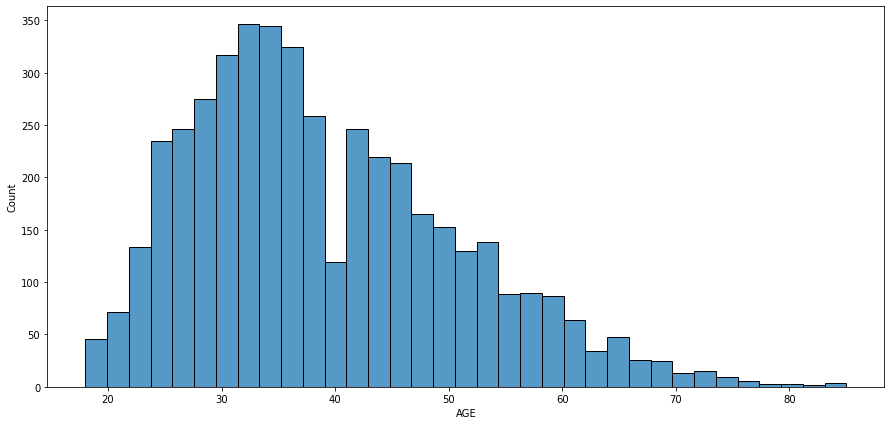

In [26]:
# FREQUENCY DISTRIBUTON OF AGE
sns.histplot(df2['AGE'])

In [27]:
df2['AGE'].skew()

0.7030238573370001

In [28]:
# AGE variable is skewed and hence using log transformation to treat the skewness
#df2['AGE']=np.log(df2['AGE'])

In [29]:
#df2['AGE'].skew()

In [31]:
df2['OCC'].value_counts()

business         2139
salaried_pvt     1090
salaried_govt     412
agriculture       365
professional      255
retired           131
housewife          61
missing            38
student             6
salaried            1
Name: OCC, dtype: int64

In [32]:
df2['OCC'].value_counts(normalize =True)

business        0.475545
salaried_pvt    0.242330
salaried_govt   0.091596
agriculture     0.081147
professional    0.056692
retired         0.029124
housewife       0.013562
missing         0.008448
student         0.001334
salaried        0.000222
Name: OCC, dtype: float64

<AxesSubplot:xlabel='OCC', ylabel='count'>

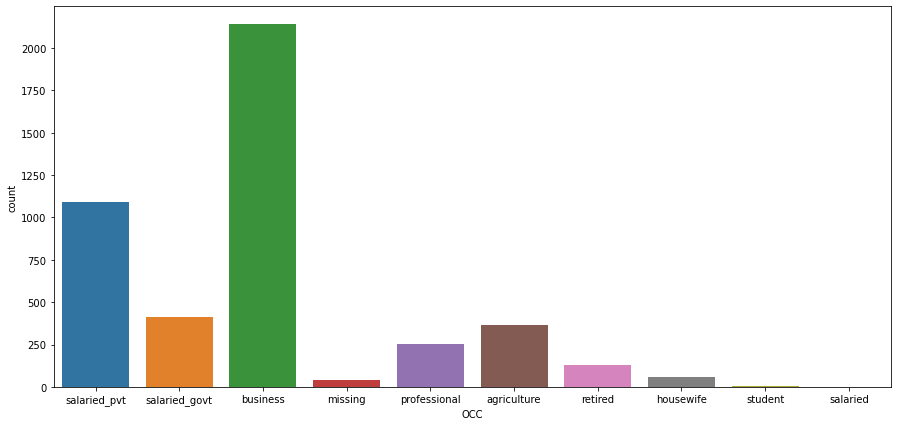

In [33]:
sns.countplot(df2['OCC'])

**INFERENCE:**
1. BUSINESS IS THE MAJOR OCCUPATION OF THE POLICY HOLDERS
2. THE CHART ILLUSTRATES THE SECOND HIGHEST OCCUPATION OF THE CUSTOMERS IS JOBS IN PRIVATE COMPANIES
3. STUDENTS AND HOUSEWIVES ARE LOWEST NUMBER OF POLICY HOLDERS

In [34]:
df2['EDUCATION'].value_counts(normalize=True)

graduate_plus       0.580036
matriculation       0.117830
higher_secondary    0.093153
missing             0.090485
masters_plus        0.087372
non_matriculation   0.031125
Name: EDUCATION, dtype: float64

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

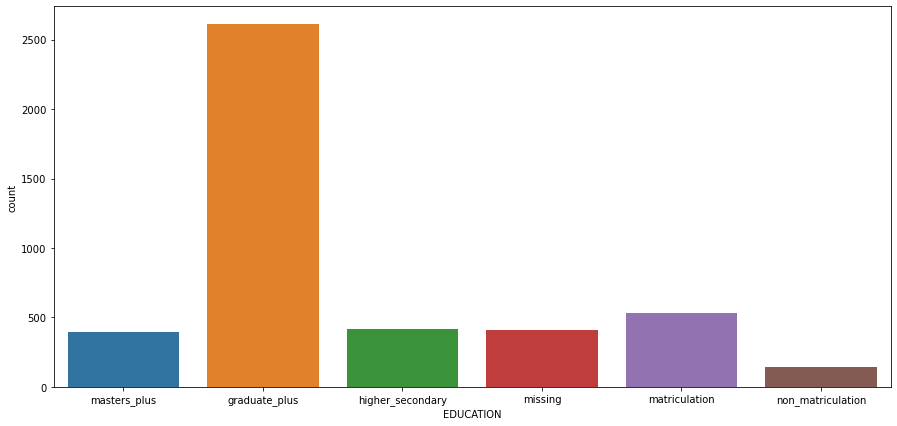

In [35]:
sns.countplot(df2['EDUCATION'])

In [36]:
df2[df2['EDUCATION']=='missing']['OCC'].value_counts()

business         176
retired           73
salaried_govt     41
salaried_pvt      34
missing           27
agriculture       24
professional      23
housewife          9
Name: OCC, dtype: int64

MISSING EDUCATION ARE FOR THE BUSINESS MEN FOLLOWED BY THE RETIRED PEOPLE

In [37]:
df2['INCOME_SEGMENT'].value_counts(normalize=True)

 3    0.255225
 4    0.204091
 5    0.161627
 2    0.150734
 6    0.094042
 7    0.055358
 1    0.042241
 8    0.018675
 9    0.011783
 10   0.004002
-99   0.002223
Name: INCOME_SEGMENT, dtype: float64

In [38]:
df2[df2['INCOME_SEGMENT']==-99]

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,NIFTY50_Stock_Price,BFS_STOCK
541,9087,27,matriculation,salaried_pvt,244221.000000,trad,-99,High,4,Feb-22,16793.900000,1601.260000
624,9942,30,graduate_plus,salaried_govt,231216.000000,ulip,-99,Medium,5,Mar-22,17464.750000,1706.050000
1138,5129,50,graduate_plus,business,110056.000000,term,-99,High,4,Apr-21,14631.100000,1104.160000
1660,9383,48,graduate_plus,salaried_pvt,403602.000000,term,-99,Very_high,5,Mar-22,17464.750000,1706.050000
1750,5520,58,graduate_plus,retired,140603.000000,ulip,-99,High,3,Jun-21,15721.500000,1210.900000
1894,9391,36,graduate_plus,salaried_pvt,400097.000000,ulip,-99,Very_high,6,Mar-22,17464.750000,1706.050000
2280,9484,32,graduate_plus,salaried_govt,342304.000000,term,-99,Missing,4,Mar-22,17464.750000,1706.050000
2317,9674,31,masters_plus,salaried_pvt,411033.000000,trad,-99,High,6,Mar-22,17464.750000,1706.050000
3067,9459,32,graduate_plus,professional,500072.000000,term,-99,Very_high,6,Mar-22,17464.750000,1706.050000
3334,6019,42,graduate_plus,business,249201.000000,trad,-99,High,4,Jul-21,15763.050000,1422.220000


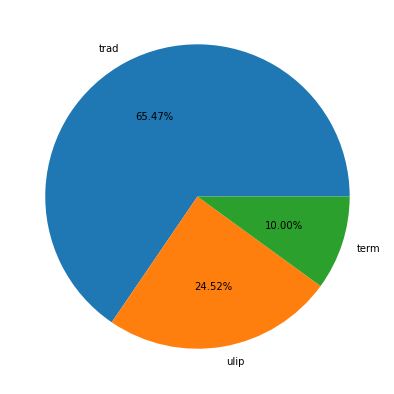

In [39]:
#df2['PROD_CATEGORY'].value_counts().plot(kind='pie')
plt.pie(df2['PROD_CATEGORY'].value_counts(),labels=df2['PROD_CATEGORY'].value_counts().index,autopct='%1.2f%%')
plt.show()

**INFERENCE:**
1. We can see there is a large imbalance in the data
2. This imbalance will cause a problem in prediction in further steps , so we need to get more information about the product category from the insurance company to proceed
3. Further modelling is done by keeping in mind the limitation due to imbalance in data hence , tree model preferred.

In [40]:
df2['PROSPERITY_INDEX_BAND'].value_counts(normalize=True)

Medium      0.359271
High        0.313473
Very_high   0.205869
Low         0.049800
Very_low    0.048688
Missing     0.022899
Name: PROSPERITY_INDEX_BAND, dtype: float64

<AxesSubplot:xlabel='PROSPERITY_INDEX_BAND', ylabel='count'>

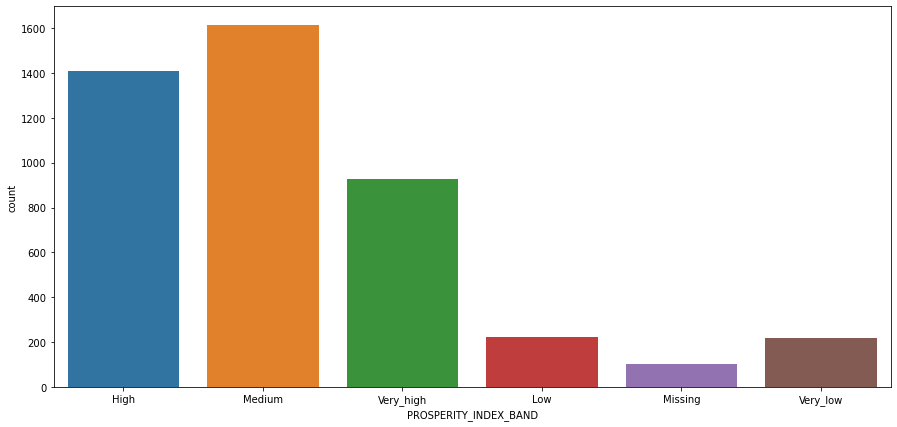

In [41]:
sns.countplot(df2['PROSPERITY_INDEX_BAND'])

**INFERENCE:**
1. Prosperity index band indicates the financial status of the people of a particular area

In [42]:
df2['QUALITY_SCORE_BAND'].value_counts(normalize=True)

4   0.323922
5   0.260783
3   0.189195
2   0.136950
6   0.084704
1   0.004446
Name: QUALITY_SCORE_BAND, dtype: float64

<AxesSubplot:xlabel='QUALITY_SCORE_BAND', ylabel='count'>

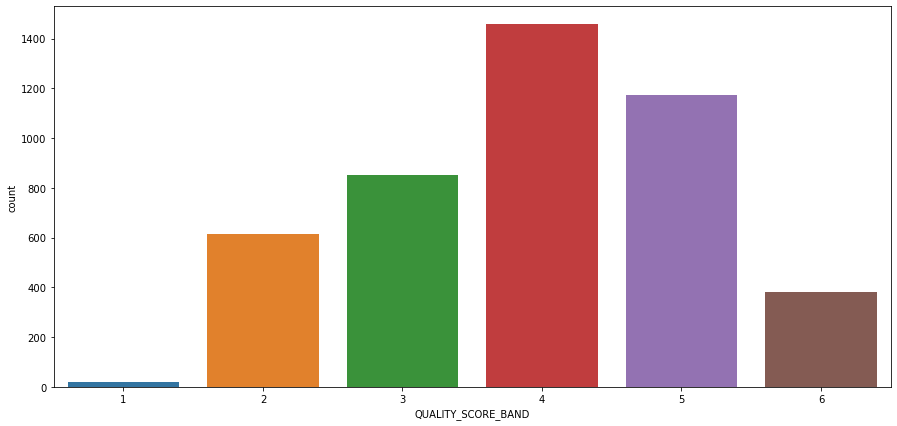

In [43]:
sns.countplot(df2['QUALITY_SCORE_BAND'])

### MULTIVARIATE ANALYSIS

<AxesSubplot:xlabel='NIFTY50_Stock_Price', ylabel='BFS_STOCK'>

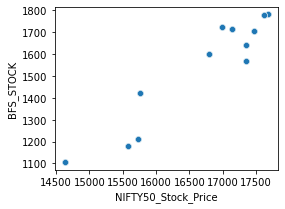

In [44]:
plt.figure(figsize=(4,3))
sns.scatterplot(df2['NIFTY50_Stock_Price'],df2['BFS_STOCK'])

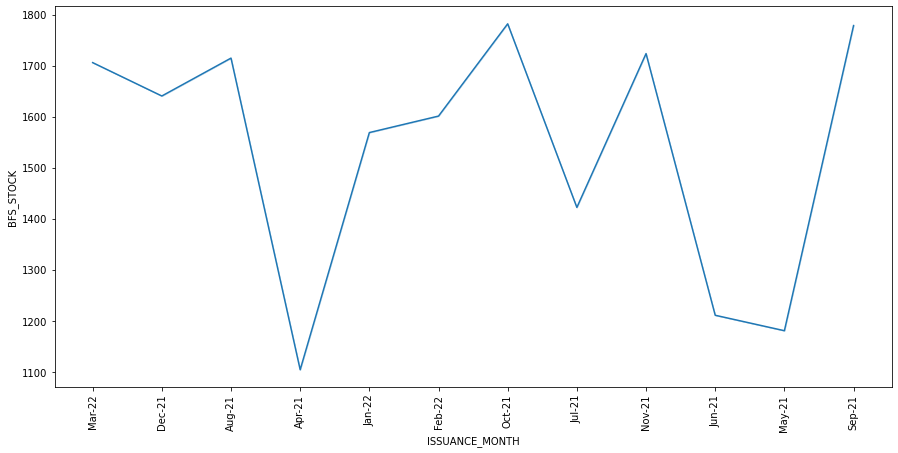

In [45]:
sns.lineplot(x=df2['ISSUANCE_MONTH'],y=df2['BFS_STOCK'])

plt.xticks(rotation=90)
plt.show()

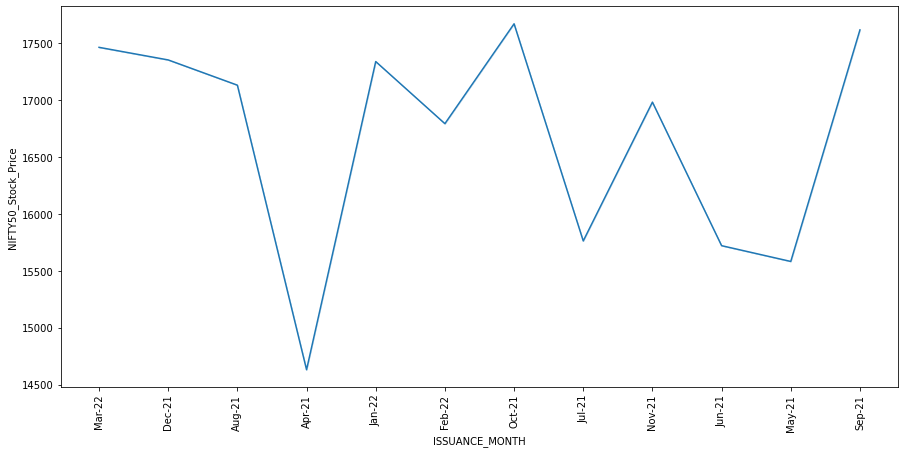

In [46]:
sns.lineplot(x=df2['ISSUANCE_MONTH'],y=df2['NIFTY50_Stock_Price'])

plt.xticks(rotation=90)
plt.show()

**INFERENCE:**
1. the lineplot illustrates that the variation in nifty50 stock price and the bajaj finserv stock price are highly correlated and hence these variables will be dropped in the final model

In [ ]:
df2.groupby(['ISSUANCE_MONTH','PROD_CATEGORY','NIFTY50_Stock_Price'])['PROD_CATEGORY'].count().sort_values(ascending=False)

In [48]:
pd.crosstab(df2['PROD_CATEGORY'],df2['ISSUANCE_MONTH'],df2['PROD_CATEGORY'],aggfunc='count')

ISSUANCE_MONTH,Apr-21,Aug-21,Dec-21,Feb-22,Jan-22,Jul-21,Jun-21,Mar-22,May-21,Nov-21,Oct-21,Sep-21
PROD_CATEGORY,,,,,,,,,,,,
term,48,31,46,29,49,33,41,42,35,31,30,35
trad,113,260,309,317,291,225,153,517,93,186,228,253
ulip,34,82,135,99,93,86,77,208,46,87,81,75


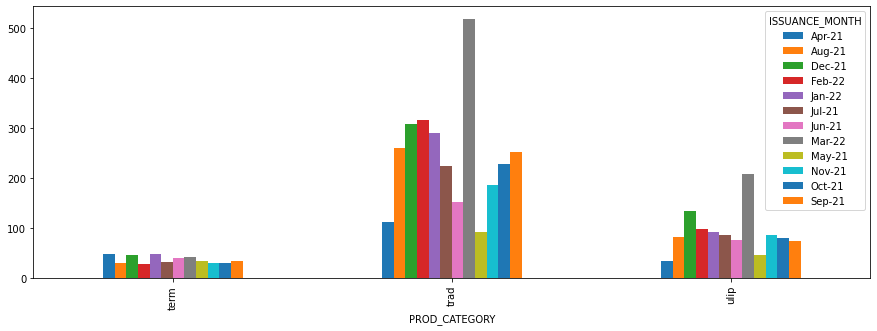

In [49]:
plt.rcParams["figure.figsize"] = (15, 5)
pd.crosstab(df2['PROD_CATEGORY'],df2['ISSUANCE_MONTH'],df2['PROD_CATEGORY'],aggfunc='count').plot(kind='bar')
plt.show()

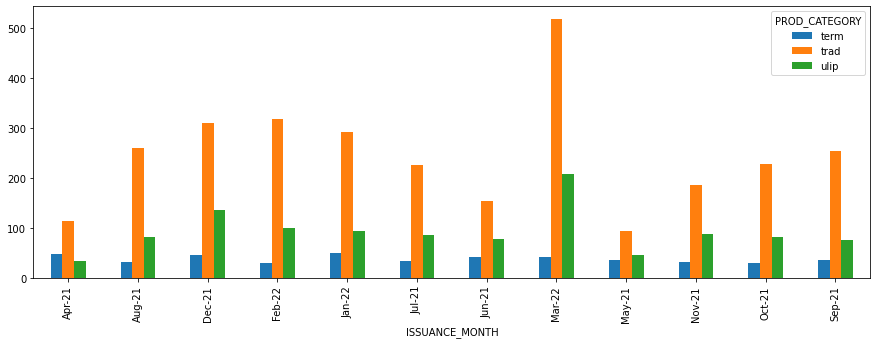

In [50]:
plt.rcParams["figure.figsize"] = (15, 5)
pd.crosstab(df2['ISSUANCE_MONTH'],df2['PROD_CATEGORY'],df2['PROD_CATEGORY'],aggfunc='count').plot(kind='bar')
plt.show()

**INFERENCES:**
1. THE CHART ILLUSTRATES THAT MARCH -22 HAS THE HIGHEST NUMBER OF POLICY ISSUED 
2. **ulip** IS THE MOST PURCHASED POLICY AMONG THE CUSTOMERS
3. **TERM** POLICY IS LEAST PURCHASED BY THE POLICY HOLDERS EXCEPT FOR THE MONTH OF AUGUST 21

<AxesSubplot:xlabel='ISSUANCE_MONTH,NIFTY50_Stock_Price'>

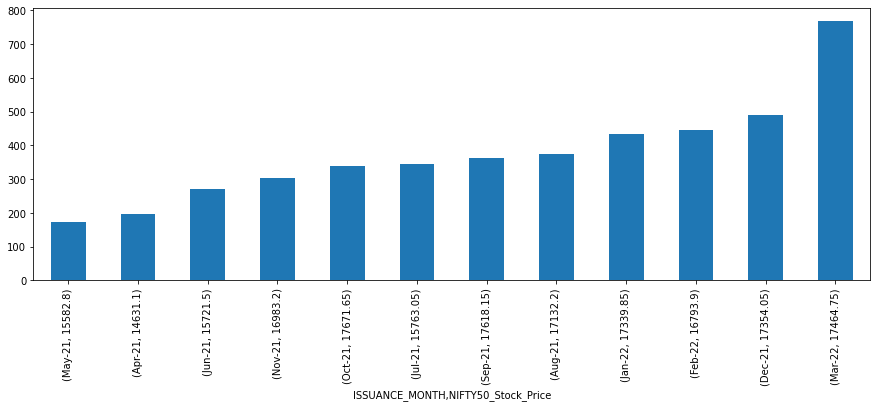

In [51]:
df2.groupby(['ISSUANCE_MONTH','NIFTY50_Stock_Price'])['PROD_CATEGORY'].count().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='ISSUANCE_MONTH', ylabel='BFS_STOCK'>

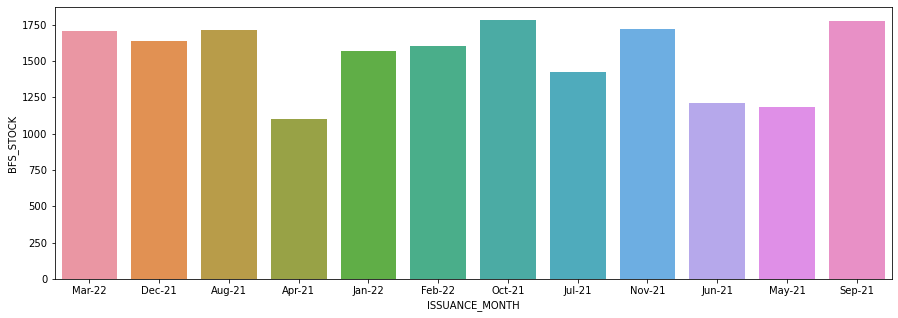

In [52]:
sns.barplot(x=df2['ISSUANCE_MONTH'],y=df2['BFS_STOCK'])

<AxesSubplot:xlabel='ISSUANCE_MONTH', ylabel='NIFTY50_Stock_Price'>

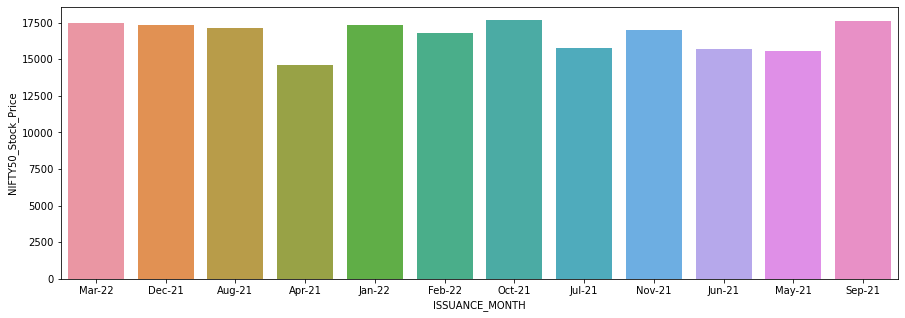

In [53]:
sns.barplot(x=df2['ISSUANCE_MONTH'],y=df2['NIFTY50_Stock_Price'])

#### Age Vs Product category

<AxesSubplot:xlabel='PROD_CATEGORY', ylabel='AGE'>

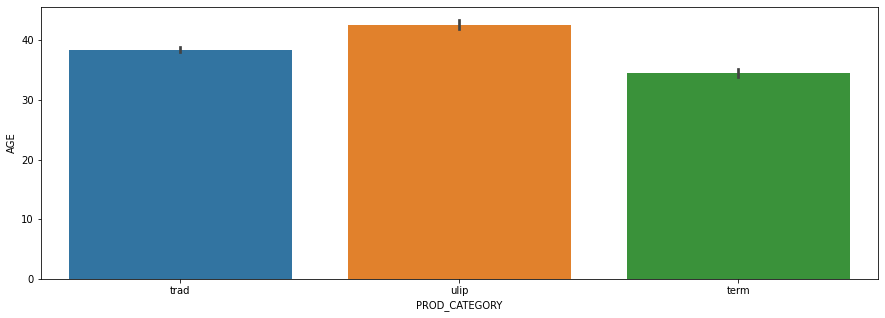

In [54]:
sns.barplot(x=df2['PROD_CATEGORY'],y=df2['AGE'])

**INFERENCES:**
1. THE CHART ILLUSTRATES ULIP IS MOSTLY PURCHASED BY PEOPLE OF AVERAGE AGE JUST OVER 40
2. **TRAD** IS  PURCHASED BY PEOPLE OF AVERAGE AGE NEARING 40
3. **TERM** POLICY IS  PURCHASED BY THE POLICY HOLDERS OF AVERAGE AGE 35

In [55]:
pd.crosstab(df2['PROD_CATEGORY'],df2['OCC'],df2['PROD_CATEGORY'],aggfunc='count')

OCC,agriculture,business,housewife,missing,professional,retired,salaried,salaried_govt,salaried_pvt,student
PROD_CATEGORY,,,,,,,,,,
term,NaN,69.000000,9.000000,7.000000,25.000000,NaN,NaN,80.000000,260.000000,NaN
trad,286.000000,1595.000000,39.000000,17.000000,155.000000,71.000000,1.000000,219.000000,558.000000,4.000000
ulip,79.000000,475.000000,13.000000,14.000000,75.000000,60.000000,NaN,113.000000,272.000000,2.000000


<AxesSubplot:xlabel='OCC'>

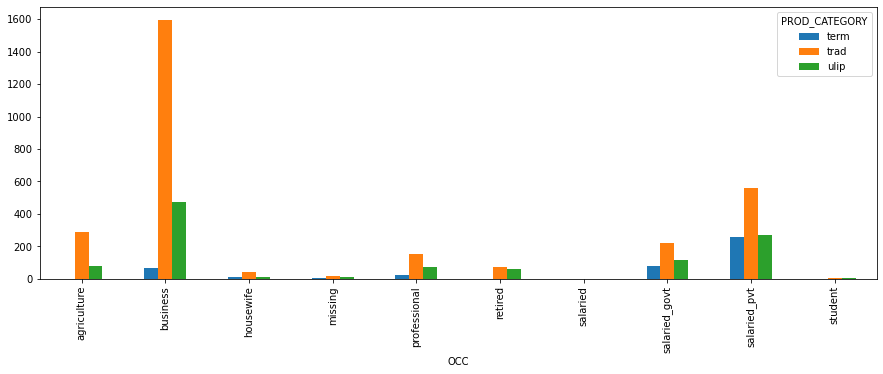

In [56]:
pd.crosstab(df2['OCC'],df2['PROD_CATEGORY'],df2['PROD_CATEGORY'],aggfunc='count').plot(kind='bar')


In [57]:
df2.groupby(['PROD_CATEGORY','OCC'])['PROD_CATEGORY'].count()

PROD_CATEGORY  OCC          
term           business           69
               housewife           9
               missing             7
               professional       25
               salaried_govt      80
               salaried_pvt      260
trad           agriculture       286
               business         1595
               housewife          39
               missing            17
               professional      155
               retired            71
               salaried            1
               salaried_govt     219
               salaried_pvt      558
               student             4
ulip           agriculture        79
               business          475
               housewife          13
               missing            14
               professional       75
               retired            60
               salaried_govt     113
               salaried_pvt      272
               student             2
Name: PROD_CATEGORY, dtype: int64

**INFERENCES:**
1. THE CHART ILLUSTRATES ULIP AND TRAD IS MOSTLY PURCHASED BY PEOPLE OF ALMOST ALL OCCUPATION FROM AGRICULTURE TO BUSINESS
2. **TERM** POLICY IS  PURCHASED MOSTLY BY BUSINESS MEN AND PRIVATE COMPANY EMPLOYEES

In [58]:
pd.crosstab(df2['PROD_CATEGORY'],df2['EDUCATION'],df2['PROD_CATEGORY'],aggfunc='count')

EDUCATION,graduate_plus,higher_secondary,masters_plus,matriculation,missing,non_matriculation
PROD_CATEGORY,,,,,,
term,337.000000,10.000000,91.000000,1.000000,11.000000,NaN
trad,1590.000000,338.000000,193.000000,429.000000,278.000000,117.000000
ulip,682.000000,71.000000,109.000000,100.000000,118.000000,23.000000


<AxesSubplot:xlabel='EDUCATION'>

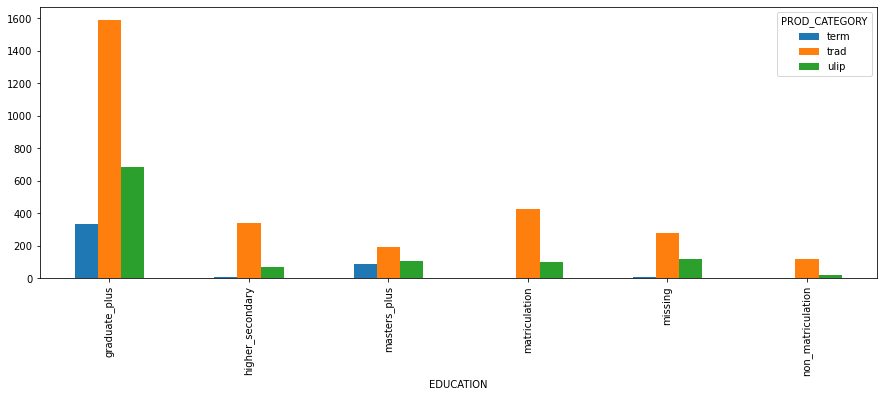

In [59]:
pd.crosstab(df2['EDUCATION'],df2['PROD_CATEGORY'],df2['PROD_CATEGORY'],aggfunc='count').plot(kind='bar')

In [60]:
pd.crosstab(df2['PROD_CATEGORY'],df2['PINCODE'],df2['PROD_CATEGORY'],aggfunc='count')

PINCODE        110003.000000  110005.000000  110006.000000  110007.000000  \
PROD_CATEGORY                                                               
term                     NaN            NaN            NaN            NaN   
trad                     NaN            NaN       1.000000            NaN   
ulip                1.000000       1.000000       2.000000       1.000000   

PINCODE        110008.000000  110009.000000  110011.000000  110014.000000  \
PROD_CATEGORY                                                               
term                     NaN            NaN            NaN            NaN   
trad                2.000000       2.000000       1.000000       1.000000   
ulip                     NaN       1.000000            NaN            NaN   

PINCODE        110015.000000  110016.000000  110017.000000  110018.000000  \
PROD_CATEGORY                                                               
term                     NaN            NaN            NaN       1.000000   
trad                2.000000       2.000000       4.000000       1.000000   
ulip                     NaN            NaN       1.000000       3.000000   

PINCODE        110019.000000  110020.000000  110022.000000  110024.000000  \
PROD_CATEGORY                                                               
term                     NaN       1.000000            NaN            NaN   
trad                2.000000       1.000000       2.000000            NaN   
ulip                2.000000            NaN            NaN       1.000000   

PINCODE        110025.000000  110026.000000  110027.000000  110029.000000  \
PROD_CATEGORY                                                               
term                2.000000       1.000000            NaN            NaN   
trad                3.000000       1.000000       1.000000       1.000000   
ulip                4.000000       1.000000       1.000000       1.000000   

PINCODE        110030.000000  110031.000000  110032.000000  110033.000000  \
PROD_CATEGORY                                                               
term                     NaN       1.000000       3.000000       2.000000   
trad                2.000000       1.000000       2.000000       2.000000   
ulip                     NaN            NaN       3.000000            NaN   

PINCODE        110034.000000  110037.000000  110038.000000  110040.000000  \
PROD_CATEGORY                                                               
term                1.000000            NaN       1.000000            NaN   
trad                3.000000       1.000000            NaN       1.000000   
ulip                     NaN       1.000000            NaN       3.000000   

PINCODE        110041.000000  110042.000000  110043.000000  110044.000000  \
PROD_CATEGORY                                                               
term                     NaN       1.000000            NaN       1.000000   
trad                3.000000            NaN       3.000000       1.000000   
ulip                1.000000            NaN            NaN            NaN   

PINCODE        110045.000000  110046.000000  110049.000000  110052.000000  \
PROD_CATEGORY                                                               
term                1.000000            NaN       1.000000            NaN   
trad                1.000000       1.000000       1.000000       1.000000   
ulip                     NaN            NaN            NaN       2.000000   

PINCODE        110053.000000  110054.000000  110055.000000  110056.000000  \
PROD_CATEGORY                                                               
term                     NaN            NaN            NaN       1.000000   
trad                     NaN            NaN       4.000000            NaN   
ulip                3.000000       2.000000            NaN            NaN   

PINCODE        110057.000000  110058.000000  110059.000000  110060.000000  \
PROD_CATEGORY                                                  

In [61]:
pd.crosstab(df2['PROD_CATEGORY'],df2['INCOME_SEGMENT'],df2['PROD_CATEGORY'],aggfunc='count')

INCOME_SEGMENT,-99,1,2,3,4,5,6,7,8,9,10
PROD_CATEGORY,,,,,,,,,,,
term,4.000000,NaN,NaN,91.000000,87.000000,136.000000,72.000000,48.000000,8.000000,3.000000,1.000000
trad,3.000000,153.000000,577.000000,805.000000,602.000000,379.000000,196.000000,130.000000,64.000000,32.000000,4.000000
ulip,3.000000,37.000000,101.000000,252.000000,229.000000,212.000000,155.000000,71.000000,12.000000,18.000000,13.000000


<AxesSubplot:xlabel='PROD_CATEGORY'>

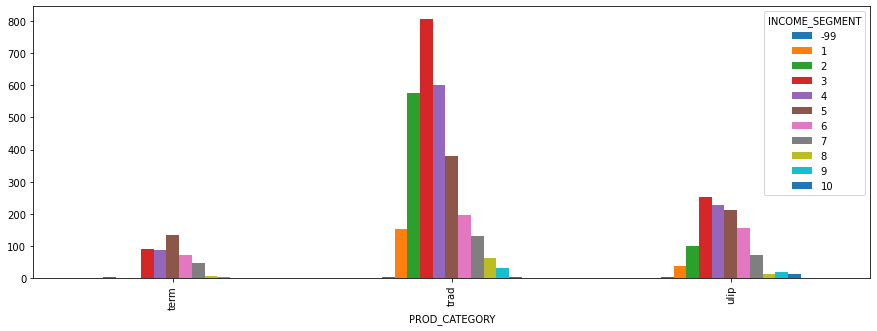

In [62]:
pd.crosstab(df2['PROD_CATEGORY'],df2['INCOME_SEGMENT'],df2['PROD_CATEGORY'],aggfunc='count').plot(kind='bar')

In [63]:
pd.crosstab(df2['PROD_CATEGORY'],df2['PROSPERITY_INDEX_BAND'],df2['INCOME_SEGMENT'],aggfunc='count')


PROSPERITY_INDEX_BAND,High,Low,Medium,Missing,Very_high,Very_low
PROD_CATEGORY,,,,,,
term,148,10,95,6,182,9
trad,869,176,1187,82,458,173
ulip,393,38,334,15,286,37


<AxesSubplot:xlabel='PROD_CATEGORY'>

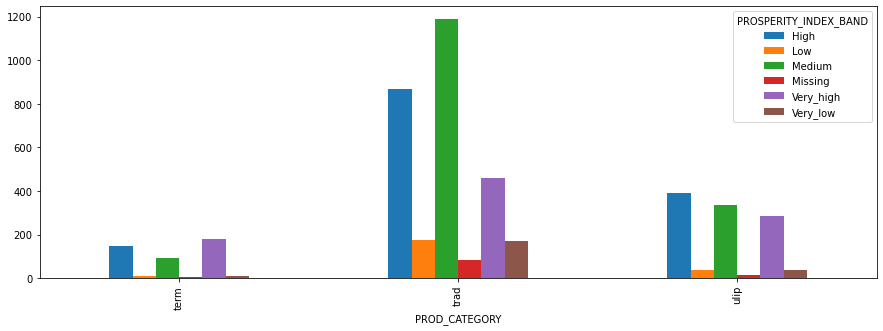

In [64]:
pd.crosstab(df2['PROD_CATEGORY'],df2['PROSPERITY_INDEX_BAND'],df2['PROD_CATEGORY'],aggfunc='count').plot(kind='bar')

<AxesSubplot:xlabel='PROSPERITY_INDEX_BAND'>

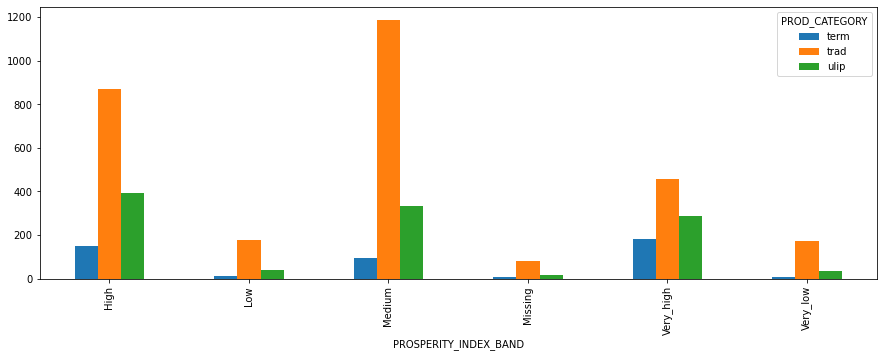

In [65]:
pd.crosstab(df2['PROSPERITY_INDEX_BAND'],df2['PROD_CATEGORY'],df2['PROD_CATEGORY'],aggfunc='count').plot(kind='bar')

In [66]:
pd.crosstab(df2['QUALITY_SCORE_BAND'],df2['PROD_CATEGORY'],df2['PROD_CATEGORY'],aggfunc='count')

PROD_CATEGORY,term,trad,ulip
QUALITY_SCORE_BAND,,,
1,NaN,18.000000,2.000000
2,4.000000,490.000000,122.000000
3,12.000000,647.000000,192.000000
4,66.000000,1029.000000,362.000000
5,230.000000,613.000000,330.000000
6,138.000000,148.000000,95.000000


<AxesSubplot:xlabel='QUALITY_SCORE_BAND'>

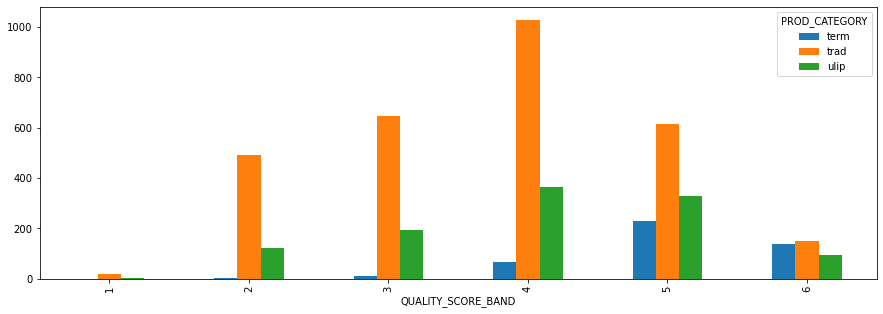

In [67]:
pd.crosstab(df2['QUALITY_SCORE_BAND'],df2['PROD_CATEGORY'],df2['PROD_CATEGORY'],aggfunc='count').plot(kind='bar')

<AxesSubplot:xlabel='PROD_CATEGORY'>

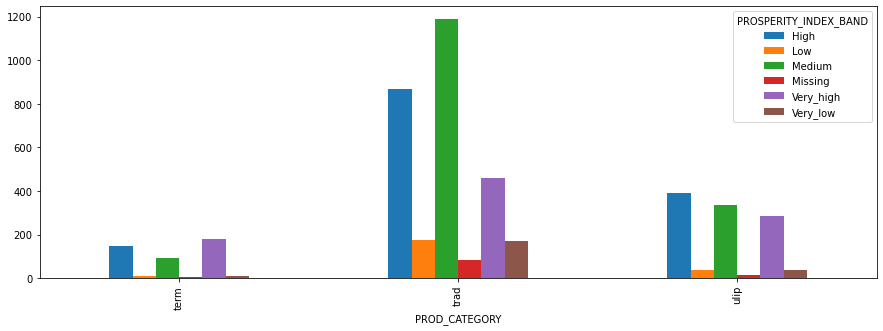

In [68]:
pd.crosstab(df2['PROD_CATEGORY'],df2['PROSPERITY_INDEX_BAND'],df2['INCOME_SEGMENT'],aggfunc='count').plot(kind='bar')

In [69]:
df2.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,NIFTY50_Stock_Price,BFS_STOCK
0,9354,27,masters_plus,salaried_pvt,495001.000000,trad,5,High,6,Mar-22,17464.750000,1706.050000
1,7823,58,graduate_plus,salaried_govt,272001.000000,ulip,4,Medium,5,Dec-21,17354.050000,1640.620000
2,6170,52,masters_plus,salaried_govt,721101.000000,trad,5,High,5,Aug-21,17132.200000,1714.880000
3,9199,52,higher_secondary,business,712612.000000,trad,3,Medium,2,Mar-22,17464.750000,1706.050000
4,9981,34,graduate_plus,salaried_pvt,110085.000000,ulip,6,Very_high,6,Mar-22,17464.750000,1706.050000


<AxesSubplot:>

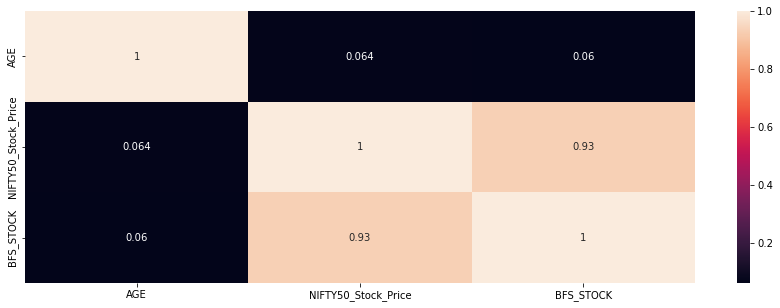

In [70]:
sns.heatmap(df2.corr(),annot=True)

**INFERENCES:**
1. The Heatmap illustrates that the NIFTY50_Stock and Bajaj finserv stock has high correlation and hence dropping nifty 50 and retaining BFS_STOCK for further analysis.

In [71]:
df2.drop('NIFTY50_Stock_Price',axis=1,inplace=True)

### FEATURE ENGINEERING

In [72]:
df2[df2['AGE']<20]

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,BFS_STOCK
112,6604,18,higher_secondary,business,700048.000000,trad,5,Very_high,4,Sep-21,1778.670000
270,7514,19,graduate_plus,business,781001.000000,ulip,5,High,4,Nov-21,1723.730000
298,5385,18,non_matriculation,student,145023.000000,trad,2,Medium,2,May-21,1180.630000
571,7542,18,higher_secondary,business,786125.000000,trad,3,High,3,Nov-21,1723.730000
693,9000,19,higher_secondary,professional,110017.000000,trad,3,Very_high,4,Feb-22,1601.260000
697,8821,18,matriculation,business,201014.000000,trad,4,Very_high,4,Feb-22,1601.260000
751,9679,18,higher_secondary,missing,201309.000000,ulip,3,High,3,Mar-22,1706.050000
763,6131,18,higher_secondary,business,394101.000000,trad,5,High,3,Aug-21,1714.880000
830,8770,18,graduate_plus,business,800009.000000,trad,3,Medium,4,Feb-22,1601.260000
837,9276,18,non_matriculation,business,845412.000000,trad,2,Medium,3,Mar-22,1706.050000


In [73]:
# GROUPING AGE INTO LEVELS
df2['AGE_GRP']=pd.cut(x=df2['AGE'],bins=[15,20,30,40,50,60,70,80,90],labels=['15-20','20-30','30-40','40-50','50-60','60-70','70-80','80+'])

<AxesSubplot:xlabel='AGE_GRP', ylabel='Count'>

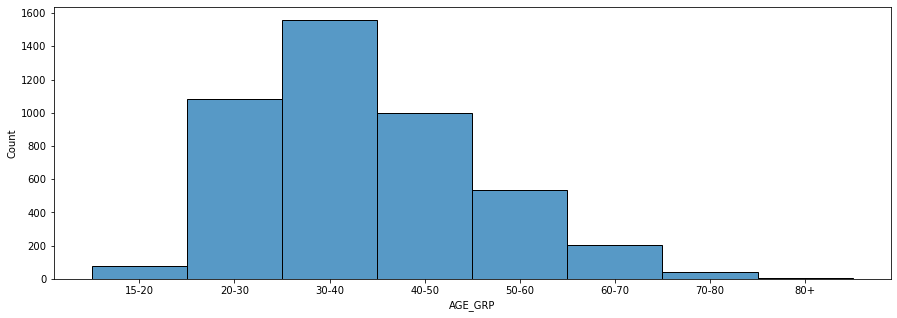

In [74]:
sns.histplot(df2['AGE_GRP'])

<AxesSubplot:xlabel='AGE_GRP', ylabel='count'>

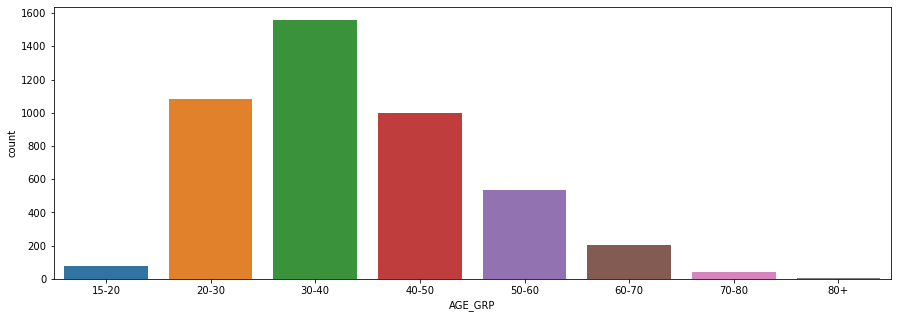

In [75]:
sns.countplot(df2['AGE_GRP'])

In [76]:
pd.crosstab(df2['PROD_CATEGORY'],df2['AGE_GRP'],df2['PROD_CATEGORY'],aggfunc='count')

AGE_GRP,15-20,20-30,30-40,40-50,50-60,60-70,70-80,80+
PROD_CATEGORY,,,,,,,,
term,0,139,227,67,17,0,0,0
trad,55,746,1019,681,315,96,26,7
ulip,21,196,312,249,202,106,17,0


<AxesSubplot:xlabel='AGE_GRP'>

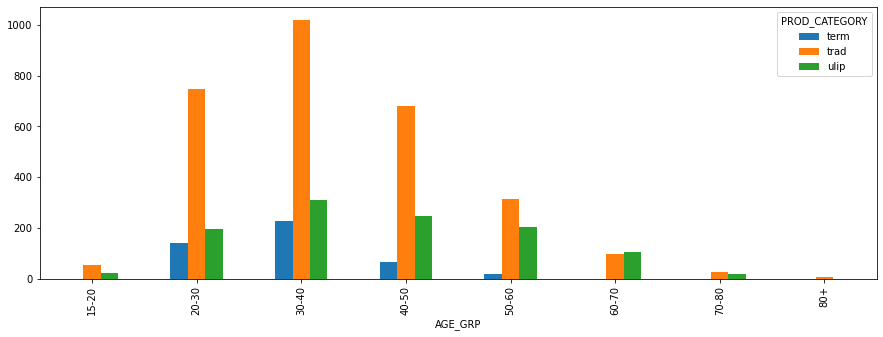

In [77]:
pd.crosstab(df2['AGE_GRP'],df2['PROD_CATEGORY'],df2['PROD_CATEGORY'],aggfunc='count').plot(kind='bar')

In [78]:
df2.columns

Index(['ID', 'AGE', 'EDUCATION', 'OCC', 'PINCODE', 'PROD_CATEGORY',
       'INCOME_SEGMENT', 'PROSPERITY_INDEX_BAND', 'QUALITY_SCORE_BAND',
       'ISSUANCE_MONTH', 'BFS_STOCK', 'AGE_GRP'],
      dtype='object')

In [79]:
# EXTRACTING YEAR FROM ISSUANCE_MONTH
df2['year']=df2['ISSUANCE_MONTH'].apply(lambda x : str(x).split('-')[-1])

In [80]:
df2.head(2)

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,BFS_STOCK,AGE_GRP,year
0,9354,27,masters_plus,salaried_pvt,495001.000000,trad,5,High,6,Mar-22,1706.050000,20-30,22
1,7823,58,graduate_plus,salaried_govt,272001.000000,ulip,4,Medium,5,Dec-21,1640.620000,50-60,21


In [81]:
pd.crosstab(df2['year'],df2['PROD_CATEGORY'],df2['PROD_CATEGORY'],aggfunc='count')

PROD_CATEGORY,term,trad,ulip
year,,,
21,330,1820,703
22,120,1125,400


<AxesSubplot:xlabel='year'>

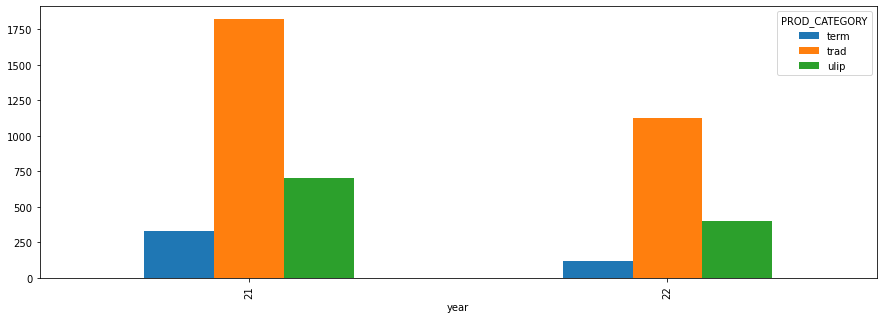

In [82]:
pd.crosstab(df2['year'],df2['PROD_CATEGORY'],df2['PROD_CATEGORY'],aggfunc='count').plot(kind='bar')

In [83]:
df2.head(1)

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,BFS_STOCK,AGE_GRP,year
0,9354,27,masters_plus,salaried_pvt,495001.000000,trad,5,High,6,Mar-22,1706.050000,20-30,22


In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4498 entries, 0 to 4497
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     4498 non-null   object  
 1   AGE                    4498 non-null   int32   
 2   EDUCATION              4498 non-null   object  
 3   OCC                    4498 non-null   object  
 4   PINCODE                4498 non-null   object  
 5   PROD_CATEGORY          4498 non-null   object  
 6   INCOME_SEGMENT         4498 non-null   object  
 7   PROSPERITY_INDEX_BAND  4498 non-null   object  
 8   QUALITY_SCORE_BAND     4498 non-null   object  
 9   ISSUANCE_MONTH         4498 non-null   object  
 10  BFS_STOCK              4498 non-null   float64 
 11  AGE_GRP                4498 non-null   category
 12  year                   4498 non-null   object  
dtypes: category(1), float64(1), int32(1), object(10)
memory usage: 409.0+ KB


In [85]:
#Drop unique columns id , pincode and repeated column age 

In [86]:
X1=df2.drop(['ID','PINCODE','PROD_CATEGORY','AGE_GRP', 'year','BFS_STOCK','ISSUANCE_MONTH'],axis=1)
y=df2['PROD_CATEGORY']
X=df2.drop(['ID','PINCODE','PROD_CATEGORY','AGE_GRP', 'year'],axis=1)

In [87]:
X.columns

Index(['AGE', 'EDUCATION', 'OCC', 'INCOME_SEGMENT', 'PROSPERITY_INDEX_BAND',
       'QUALITY_SCORE_BAND', 'ISSUANCE_MONTH', 'BFS_STOCK'],
      dtype='object')

### FEATURE ENCODING

In [88]:
X['PROSPERITY_INDEX_BAND'].replace({'Missing':0,'Very_high':1,'High':2,'Medium':3,'Low':4,'Very_low':5},inplace=True)
X['PROSPERITY_INDEX_BAND']=X['PROSPERITY_INDEX_BAND'].astype('object')

In [89]:
cat_cols=X[['EDUCATION', 'OCC','ISSUANCE_MONTH']]

In [90]:
dummy=pd.get_dummies(cat_cols,drop_first=True)

In [91]:
X=X.drop(cat_cols,axis=1)

In [92]:
X=pd.concat([X,dummy],axis=1)

In [93]:
X.head(2)

,AGE,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,BFS_STOCK,EDUCATION_higher_secondary,EDUCATION_masters_plus,EDUCATION_matriculation,EDUCATION_missing,EDUCATION_non_matriculation,OCC_business,OCC_housewife,OCC_missing,OCC_professional,OCC_retired,OCC_salaried,OCC_salaried_govt,OCC_salaried_pvt,OCC_student,ISSUANCE_MONTH_Aug-21,ISSUANCE_MONTH_Dec-21,ISSUANCE_MONTH_Feb-22,ISSUANCE_MONTH_Jan-22,ISSUANCE_MONTH_Jul-21,ISSUANCE_MONTH_Jun-21,ISSUANCE_MONTH_Mar-22,ISSUANCE_MONTH_May-21,ISSUANCE_MONTH_Nov-21,ISSUANCE_MONTH_Oct-21,ISSUANCE_MONTH_Sep-21
0,27,5,2,6,1706.050000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,58,4,3,5,1640.620000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4498 entries, 0 to 4497
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AGE                          4498 non-null   int32  
 1   INCOME_SEGMENT               4498 non-null   object 
 2   PROSPERITY_INDEX_BAND        4498 non-null   object 
 3   QUALITY_SCORE_BAND           4498 non-null   object 
 4   BFS_STOCK                    4498 non-null   float64
 5   EDUCATION_higher_secondary   4498 non-null   uint8  
 6   EDUCATION_masters_plus       4498 non-null   uint8  
 7   EDUCATION_matriculation      4498 non-null   uint8  
 8   EDUCATION_missing            4498 non-null   uint8  
 9   EDUCATION_non_matriculation  4498 non-null   uint8  
 10  OCC_business                 4498 non-null   uint8  
 11  OCC_housewife                4498 non-null   uint8  
 12  OCC_missing                  4498 non-null   uint8  
 13  OCC_professional  

### FEATURE SELECTION

In [95]:
# random forest

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=48)

from sklearn.ensemble import RandomForestClassifier
rf_mod=RandomForestClassifier(max_depth=5, n_estimators=100,class_weight='balanced')
rf_mod.fit(xtrain,ytrain)
ypred_rf=rf_mod.predict(xtest)

from sklearn.metrics import classification_report,cohen_kappa_score
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

        term       0.29      0.80      0.42       132
        trad       0.81      0.60      0.69       893
        ulip       0.35      0.34      0.35       325

    accuracy                           0.56      1350
   macro avg       0.48      0.58      0.49      1350
weighted avg       0.65      0.56      0.58      1350



In [96]:

feature_scores = pd.Series(rf_mod.feature_importances_, index=xtrain.columns).sort_values(ascending=False)

feature_scores[feature_scores>0.005].index

Index(['QUALITY_SCORE_BAND', 'AGE', 'INCOME_SEGMENT', 'OCC_salaried_pvt',
       'OCC_business', 'BFS_STOCK', 'PROSPERITY_INDEX_BAND',
       'EDUCATION_matriculation', 'OCC_salaried_govt',
       'EDUCATION_masters_plus', 'EDUCATION_higher_secondary', 'OCC_retired',
       'EDUCATION_missing', 'ISSUANCE_MONTH_Mar-22', 'ISSUANCE_MONTH_May-21'],
      dtype='object')

<AxesSubplot:>

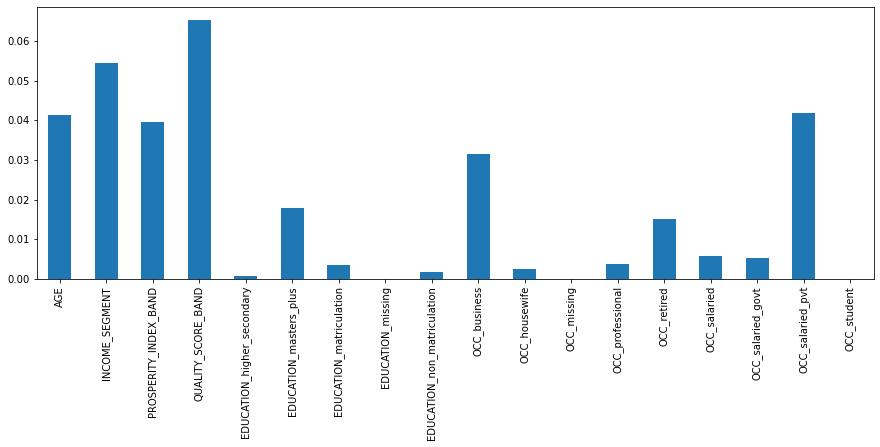

In [489]:
from sklearn.feature_selection import mutual_info_classif
imp=mutual_info_classif(X,y)
feat_imp=pd.Series(imp,X.columns[0:len(X.columns)])
feat_imp.plot(kind='bar')

In [487]:
X.columns

Index(['AGE', 'INCOME_SEGMENT', 'PROSPERITY_INDEX_BAND', 'QUALITY_SCORE_BAND',
       'EDUCATION_higher_secondary', 'EDUCATION_masters_plus',
       'EDUCATION_matriculation', 'EDUCATION_missing',
       'EDUCATION_non_matriculation', 'OCC_business', 'OCC_housewife',
       'OCC_missing', 'OCC_professional', 'OCC_retired', 'OCC_salaried',
       'OCC_salaried_govt', 'OCC_salaried_pvt', 'OCC_student'],
      dtype='object')

In [376]:
X1=X[['QUALITY_SCORE_BAND', 'AGE', 'INCOME_SEGMENT', 'OCC_salaried_pvt',
       'OCC_business', 'BFS_STOCK', 'PROSPERITY_INDEX_BAND',
       'EDUCATION_matriculation', 'OCC_salaried_govt',
       'EDUCATION_masters_plus', 'EDUCATION_higher_secondary', 'OCC_retired',
       'EDUCATION_missing', 'ISSUANCE_MONTH_Mar-22', 'ISSUANCE_MONTH_May-21']]

### MODEL BUILDING

In [379]:
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X1,y,test_size=0.3,random_state=48,stratify=y)


In [380]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,cohen_kappa_score
logreg=LogisticRegression()
mod_lg=logreg.fit(xtrain1,ytrain1)
ypred_lg=mod_lg.predict(xtest1)
print(classification_report(ytest1,ypred_lg))

              precision    recall  f1-score   support

        term       0.33      0.12      0.17       135
        trad       0.67      0.95      0.79       884
        ulip       0.31      0.05      0.08       331

    accuracy                           0.64      1350
   macro avg       0.44      0.37      0.35      1350
weighted avg       0.55      0.64      0.55      1350



### DECISION TREE

In [126]:
#decision tree

#from sklearn.model_selection import train_test_split
#xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=48)

from sklearn.ensemble import RandomForestClassifier
ds_mod=DecisionTreeClassifier(max_depth=5, criterion='entropy',class_weight='balanced')
ds_mod.fit(xtrain1,ytrain1)
ypred_ds_wgt=ds_mod.predict(xtest1)

from sklearn.metrics import classification_report,cohen_kappa_score
print(classification_report(ytest1,ypred_ds_wgt))

              precision    recall  f1-score   support

        term       0.28      0.82      0.42       132
        trad       0.79      0.57      0.66       893
        ulip       0.31      0.30      0.31       325

    accuracy                           0.53      1350
   macro avg       0.46      0.56      0.46      1350
weighted avg       0.63      0.53      0.55      1350



In [105]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
# pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_model = DecisionTreeClassifier(random_state = 10,class_weight='balanced')

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_model, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid.fit(xtrain1, ytrain1)

# get the best parameters
print('Best parameters for Decision Tree Classifier: ', tree_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2} 



In [129]:
#decision tree with tuned hyperparameter

#from sklearn.model_selection import train_test_split
#xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=48)

from sklearn.ensemble import RandomForestClassifier
ds_mod1=DecisionTreeClassifier(max_depth=7, criterion='gini',min_samples_split=2,class_weight='balanced')
ds_mod1.fit(xtrain1,ytrain1)
ypred_ds1=ds_mod1.predict(xtest1)

from sklearn.metrics import classification_report,cohen_kappa_score
print(classification_report(ytest1,ypred_ds1))

              precision    recall  f1-score   support

        term       0.29      0.67      0.41       132
        trad       0.78      0.60      0.68       893
        ulip       0.31      0.35      0.33       325

    accuracy                           0.54      1350
   macro avg       0.46      0.54      0.47      1350
weighted avg       0.62      0.54      0.57      1350



### RANDOM FOREST

In [130]:
# random forest

#from sklearn.model_selection import train_test_split
#xtrain,xtest,ytrain,ytest=train_test_split(X1,y,test_size=0.3,random_state=48)

from sklearn.ensemble import RandomForestClassifier
rf_mod=RandomForestClassifier(max_depth=5, n_estimators=100,class_weight='balanced')
rf_mod.fit(xtrain1,ytrain1)
ypred_rf=rf_mod.predict(xtest1)

from sklearn.metrics import classification_report,cohen_kappa_score
print(classification_report(ytest1,ypred_rf))

              precision    recall  f1-score   support

        term       0.29      0.79      0.42       132
        trad       0.81      0.59      0.68       893
        ulip       0.35      0.37      0.36       325

    accuracy                           0.56      1350
   macro avg       0.48      0.58      0.49      1350
weighted avg       0.65      0.56      0.58      1350



In [108]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [90, 100, 150, 200],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10,class_weight='balanced')

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_model = rf_grid.fit(xtrain1, ytrain1)

# get the best parameters
print('Best parameters for random forest Classifier: ', rf_model.best_params_, '\n')

Best parameters for random forest Classifier:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150} 



In [327]:
# random forest

#from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X1,y,test_size=0.3,random_state=48,stratify=y)

from sklearn.ensemble import RandomForestClassifier
rf_mod1=RandomForestClassifier(criterion='gini',max_depth=20, n_estimators=150,class_weight='balanced',min_samples_split=2)
rf_mod1.fit(xtrain1,ytrain1)
ypred_rf1=rf_mod1.predict(xtest1)

from sklearn.metrics import classification_report,cohen_kappa_score
print(classification_report(ytest1,ypred_rf1))

              precision    recall  f1-score   support

        term       0.39      0.37      0.38       135
        trad       0.72      0.80      0.76       884
        ulip       0.39      0.28      0.33       331

    accuracy                           0.63      1350
   macro avg       0.50      0.48      0.49      1350
weighted avg       0.61      0.63      0.61      1350



In [324]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [112]:
from sklearn.model_selection import RandomizedSearchCV
rf_Model=RandomForestClassifier(class_weight='balanced')
#space = dict()
#space['solver'] = ['newton-cg', 'lbfgs', 'saga']
#space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
#space['C'] = loguniform(1e-5, 100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rf_RandomGrid = RandomizedSearchCV(rf_Model, param_distributions=param_grid,
                                   scoring='accuracy', cv = cv, verbose=2, n_jobs = -1, random_state=1)
rf_RandomGrid.fit(xtrain1, ytrain1)
rf_RandomGrid.best_params_

Fitting 30 folds for each of 10 candidates, totalling 300 fits


{'n_estimators': 48,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

In [321]:
from sklearn.ensemble import RandomForestClassifier
rf_mod1=RandomForestClassifier(criterion='entropy',max_depth=4,max_features='auto',min_samples_leaf=1, n_estimators=48,class_weight='balanced',min_samples_split=2,bootstrap=True)
rf_mod1.fit(xtrain1,ytrain1)
ypred_rf1=rf_mod1.predict(xtest1)

from sklearn.metrics import classification_report,cohen_kappa_score
print(classification_report(ytest1,ypred_rf1))

              precision    recall  f1-score   support

        term       0.28      0.81      0.42       135
        trad       0.79      0.63      0.70       884
        ulip       0.39      0.30      0.34       331

    accuracy                           0.57      1350
   macro avg       0.49      0.58      0.49      1350
weighted avg       0.64      0.57      0.59      1350



### ADABOOST CLASSIFIER

In [319]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 48)

# fit the model using fit() on train data
ada_model.fit(xtrain1, ytrain1)

# predict the attrition on the test data
y_pred_ada = ada_model.predict(xtest1)

# print the classification report
print(classification_report(ytest1, y_pred_ada))

              precision    recall  f1-score   support

        term       0.44      0.44      0.44       135
        trad       0.72      0.88      0.79       884
        ulip       0.50      0.21      0.29       331

    accuracy                           0.67      1350
   macro avg       0.56      0.51      0.51      1350
weighted avg       0.64      0.67      0.64      1350



In [334]:
#from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X1,y,test_size=0.3,random_state=8,stratify=y)
rmodel=RandomForestClassifier(criterion='gini',max_depth=20, n_estimators=300,min_samples_split=2)
ada_model_rf = AdaBoostClassifier(base_estimator=rmodel, random_state = 10)

# fit the model using fit() on train data
ada_model_rf.fit(xtrain1, ytrain1)

# predict the attrition on the test data
y_pred_ada_rf = ada_model_rf.predict(xtest1)

# print the classification report
print(classification_report(ytest1, y_pred_ada_rf))

              precision    recall  f1-score   support

        term       0.38      0.31      0.34       135
        trad       0.71      0.84      0.77       884
        ulip       0.38      0.23      0.29       331

    accuracy                           0.64      1350
   macro avg       0.49      0.46      0.47      1350
weighted avg       0.60      0.64      0.61      1350



In [330]:
dmodel=DecisionTreeClassifier(max_depth=7, criterion='gini',min_samples_split=2)
ada_model_ds = AdaBoostClassifier(base_estimator=dmodel, random_state = 10)

# fit the model using fit() on train data
ada_model_ds.fit(xtrain1, ytrain1)

# predict the attrition on the test data
y_pred_ada_ds = ada_model_ds.predict(xtest1)

# print the classification report
print(classification_report(ytest1, y_pred_ada_ds))

              precision    recall  f1-score   support

        term       0.40      0.33      0.36       135
        trad       0.68      0.66      0.67       884
        ulip       0.29      0.34      0.32       331

    accuracy                           0.55      1350
   macro avg       0.46      0.44      0.45      1350
weighted avg       0.56      0.55      0.55      1350



### GRADIENT BOOSTING

In [279]:
# instantiate the 'GradientBoostingClassifier' 
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# pass the 'random_state' to obtain the same results for each time you run the code
#from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X1,y,test_size=0.3,random_state=48,stratify=y)
gboost_model = GradientBoostingClassifier(n_estimators = 100, max_depth = 3, random_state =100)

# fit the model using fit() on train data
gboost_model.fit(xtrain1, ytrain1)
# predict the attrition on the test data
y_pred_gb = gboost_model.predict(xtest1)

print('The accuracy score is ', round(accuracy_score(ytest1, y_pred_gb), 4))
print(classification_report(ytest1, y_pred_gb))

The accuracy score is  0.6785
              precision    recall  f1-score   support

        term       0.51      0.35      0.41       135
        trad       0.70      0.92      0.80       884
        ulip       0.55      0.17      0.26       331

    accuracy                           0.68      1350
   macro avg       0.59      0.48      0.49      1350
weighted avg       0.65      0.68      0.63      1350



In [286]:
# instantiate the 'GradientBoostingClassifier' 
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# pass the 'random_state' to obtain the same results for each time you run the code
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X1,y,test_size=0.3,stratify=y)
gboost_model = GradientBoostingClassifier(loss='log_loss',n_estimators = 100, max_depth = 2, random_state = 8,learning_rate=0.1)

# fit the model using fit() on train data
gboost_model.fit(xtrain1, ytrain1)
# predict the attrition on the test data
y_pred_gb = gboost_model.predict(xtest1)

print('The accuracy score is ', round(accuracy_score(ytest1, y_pred_gb), 4))
print(classification_report(ytest1, y_pred_gb))

The accuracy score is  0.6874
              precision    recall  f1-score   support

        term       0.50      0.37      0.43       135
        trad       0.70      0.95      0.81       884
        ulip       0.68      0.12      0.21       331

    accuracy                           0.69      1350
   macro avg       0.63      0.48      0.48      1350
weighted avg       0.68      0.69      0.62      1350



In [265]:
xtrain1.columns

Index(['QUALITY_SCORE_BAND', 'AGE', 'INCOME_SEGMENT', 'OCC_salaried_pvt',
       'OCC_business', 'BFS_STOCK', 'PROSPERITY_INDEX_BAND',
       'EDUCATION_matriculation', 'OCC_salaried_govt',
       'EDUCATION_masters_plus', 'EDUCATION_higher_secondary', 'OCC_retired',
       'EDUCATION_missing', 'ISSUANCE_MONTH_Mar-22', 'ISSUANCE_MONTH_May-21'],
      dtype='object')

### EXTREME GRADIENT BOOSTING

In [295]:
ytrain2=ytrain1.replace({'term':0,'trad':1,'ulip':2})
xtrain2=xtrain1.astype('int')
xtest2=xtest1.astype('int')
ytrain2.dtype
ytest2=ytest1.replace({'term':0,'trad':1,'ulip':2})
ytest1.dtype
xgb_model =XGBClassifier(eta=0.1, max_depth=3, colsample_bytree=0.5,  booster='gbtree')

hr_pred = xgb_model.fit(xtrain2._get_numeric_data(), np.ravel(ytrain2)).predict(xtest2._get_numeric_data())
print('The accuracy score is ', round(accuracy_score(ytest2, hr_pred), 4))
print(classification_report(ytest2, hr_pred))

The accuracy score is  0.6778
              precision    recall  f1-score   support

           0       0.50      0.33      0.39       135
           1       0.70      0.94      0.80       884
           2       0.59      0.11      0.19       331

    accuracy                           0.68      1350
   macro avg       0.59      0.46      0.46      1350
weighted avg       0.65      0.68      0.61      1350



### STACKING SDECISION TREE AND RANDOM FOREST

In [306]:
base_learners = [('Decision Tree', DecisionTreeClassifier(max_depth=7, criterion='gini',min_samples_split=2,class_weight='balanced')),
                 ('Random Forest', RandomForestClassifier(criterion='gini',max_depth=20, n_estimators=150,class_weight='balanced',min_samples_split=2))]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the GradientBoosting model as the 'final_estimator'/ meta model
# pass the 'random_state' to obtain the same results for each time you run the code
stack_model_gdBoost = StackingClassifier(estimators = base_learners, final_estimator = GradientBoostingClassifier(loss='log_loss',n_estimators = 100, max_depth = 2, random_state = 42,learning_rate=0.1))

# fit the model on train dataset
stack_model_gdBoost.fit(xtrain1, ytrain1)
y_pred = stack_model_gdBoost.predict(xtest1)
print(classification_report(ytest1, y_pred))


              precision    recall  f1-score   support

        term       0.37      0.15      0.21       135
        trad       0.68      0.93      0.79       884
        ulip       0.41      0.10      0.16       331

    accuracy                           0.65      1350
   macro avg       0.49      0.40      0.39      1350
weighted avg       0.58      0.65      0.58      1350



### PREDICTIONS ON TEST DATA

In [221]:
df_test=pd.read_csv('test.csv')
df_test.head(2)

,ID,AGE,EDUCATION,OCC,PINCODE,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,7378,40,graduate_plus,business,581110,4,Medium,4,Nov-21
1,9511,44,graduate_plus,business,282002,5,High,4,Mar-22


In [222]:
df_test.isnull().sum()

ID                       0
AGE                      0
EDUCATION                0
OCC                      0
PINCODE                  0
INCOME_SEGMENT           0
PROSPERITY_INDEX_BAND    0
QUALITY_SCORE_BAND       0
ISSUANCE_MONTH           0
dtype: int64

In [223]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     500 non-null    int64 
 1   AGE                    500 non-null    int64 
 2   EDUCATION              500 non-null    object
 3   OCC                    500 non-null    object
 4   PINCODE                500 non-null    int64 
 5   INCOME_SEGMENT         500 non-null    int64 
 6   PROSPERITY_INDEX_BAND  500 non-null    object
 7   QUALITY_SCORE_BAND     500 non-null    int64 
 8   ISSUANCE_MONTH         500 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


In [224]:
df_test1=df_test.merge(df1,right_on='Date',left_on='ISSUANCE_MONTH',how='left')
df_test1.head(2)

,ID,AGE,EDUCATION,OCC,PINCODE,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,Date,NIFTY50_Stock_Price,BFS_STOCK
0,7378,40,graduate_plus,business,581110,4,Medium,4,Nov-21,Nov-21,"16,983.20","1,723.73"
1,9511,44,graduate_plus,business,282002,5,High,4,Mar-22,Mar-22,"17,464.75","1,706.05"


In [225]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     500 non-null    int64 
 1   AGE                    500 non-null    int64 
 2   EDUCATION              500 non-null    object
 3   OCC                    500 non-null    object
 4   PINCODE                500 non-null    int64 
 5   INCOME_SEGMENT         500 non-null    int64 
 6   PROSPERITY_INDEX_BAND  500 non-null    object
 7   QUALITY_SCORE_BAND     500 non-null    int64 
 8   ISSUANCE_MONTH         500 non-null    object
 9   Date                   500 non-null    object
 10  NIFTY50_Stock_Price    500 non-null    object
 11  BFS_STOCK              500 non-null    object
dtypes: int64(5), object(7)
memory usage: 50.8+ KB


In [226]:
df_test1['BFS_STOCK']=df_test1['BFS_STOCK'].replace({',':''},regex=True)
df_test1=df_test1.round({'BFS_STOCK':2})
df_test1['BFS_STOCK']=pd.to_numeric(df_test1['BFS_STOCK'])

In [227]:
df_test1[['PINCODE','INCOME_SEGMENT','QUALITY_SCORE_BAND','ID']]=df_test1[['PINCODE','INCOME_SEGMENT','QUALITY_SCORE_BAND','ID']].astype(object)

In [228]:
df_test1.drop(['Date','NIFTY50_Stock_Price','PINCODE'],axis=1,inplace=True)

In [229]:
df_test1['year']=df_test1['ISSUANCE_MONTH'].apply(lambda x : str(x).split('-')[-1])

In [230]:
df_test1['AGE_GRP']=pd.cut(x=df_test1['AGE'],bins=[15,20,30,40,50,60,70,80,90],labels=['15-20','20-30','30-40','40-50','50-60','60-70','70-80','80+'])

In [231]:
#df_test1.drop('AGE_GRP',axis=1,inplace=True)

In [247]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     500 non-null    object  
 1   AGE                    500 non-null    int64   
 2   EDUCATION              500 non-null    object  
 3   OCC                    500 non-null    object  
 4   INCOME_SEGMENT         500 non-null    object  
 5   PROSPERITY_INDEX_BAND  500 non-null    object  
 6   QUALITY_SCORE_BAND     500 non-null    object  
 7   ISSUANCE_MONTH         500 non-null    object  
 8   BFS_STOCK              500 non-null    float64 
 9   year                   500 non-null    object  
 10  AGE_GRP                500 non-null    category
dtypes: category(1), float64(1), int64(1), object(8)
memory usage: 43.8+ KB


In [248]:
XS=df_test1.drop(['ID','AGE_GRP','year'],axis=1)
XS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    500 non-null    int64  
 1   EDUCATION              500 non-null    object 
 2   OCC                    500 non-null    object 
 3   INCOME_SEGMENT         500 non-null    object 
 4   PROSPERITY_INDEX_BAND  500 non-null    object 
 5   QUALITY_SCORE_BAND     500 non-null    object 
 6   ISSUANCE_MONTH         500 non-null    object 
 7   BFS_STOCK              500 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 35.2+ KB


In [249]:
XS['PROSPERITY_INDEX_BAND'].replace({'Missing':0,'Very_high':1,'High':2,'Medium':3,'Low':4,'Very_low':5},inplace=True)
XS['PROSPERITY_INDEX_BAND']=XS['PROSPERITY_INDEX_BAND'].astype('object')

In [250]:
dummies=pd.get_dummies(XS[['OCC','EDUCATION','ISSUANCE_MONTH']],drop_first=True)


In [251]:
XS=XS.drop(['OCC','EDUCATION'],axis=1)

In [252]:
XS=pd.concat([XS,dummies],axis=1)

In [254]:
XS=XS[['QUALITY_SCORE_BAND', 'AGE', 'INCOME_SEGMENT', 'OCC_salaried_pvt',
       'OCC_business', 'BFS_STOCK', 'PROSPERITY_INDEX_BAND',
       'EDUCATION_matriculation', 'OCC_salaried_govt',
       'EDUCATION_masters_plus', 'EDUCATION_higher_secondary', 'OCC_retired',
       'EDUCATION_missing', 'ISSUANCE_MONTH_Mar-22', 'ISSUANCE_MONTH_May-21']]

### MODEL PREDICTIONS (GRADIENT BOOSTING , LOGISTIC REGRESSION , STACKING MODEL)

In [292]:
ypred_gb=gboost_model.predict(XS)
l=list(ypred_gb)
final=pd.DataFrame(l,columns=['PROD_CATEGORY'])
final['ID']=df_test1['ID']
#

In [293]:
final['PROD_CATEGORY'].value_counts()

trad    433
term     46
ulip     21
Name: PROD_CATEGORY, dtype: int64

In [294]:
final.to_csv('pred_gboost.csv',index=False) # 68.6

In [272]:
ypred_stack=stack_model_gdBoost.predict(XS)
l=list(ypred_stack)
final_stack=pd.DataFrame(l,columns=['PROD_CATEGORY'])
final_stack['ID']=df_test1['ID']


In [273]:
final_stack['PROD_CATEGORY'].value_counts()

trad    440
term     46
ulip     14
Name: PROD_CATEGORY, dtype: int64

In [274]:
final_stack.to_csv('pred_stack.csv',index=False)

In [297]:
XS=XS.astype('int')


In [301]:
ypred_xg=xgb_model.predict(XS)
l=list(ypred_xg)
final_xg=pd.DataFrame(l,columns=['PROD_CATEGORY'])
final_xg['ID']=df_test1['ID']


In [302]:
final_xg['PROD_CATEGORY']=final_xg['PROD_CATEGORY'].replace({0:'term',1:'trad',2:'ulip'})

In [304]:
final_xg.to_csv('pred_xg.csv',index=False)

In [313]:
ypred_log=mod_lg.predict(XS)
l=list(ypred_log)
final_log=pd.DataFrame(l,columns=['PROD_CATEGORY'])
final_log['ID']=df_test1['ID']


In [314]:
final_log.to_csv('pred_log.csv',index=False)

#### CUSTOMER SEGMENTATION

In [381]:
pip install kmodes

In [382]:
from kmodes.kprototypes import KPrototypes

In [384]:
x=df2.drop(['PINCODE','ID','AGE_GRP','year'],axis=1)

In [385]:
catColumnsPos = [x.columns.get_loc(col) for col in list(x.select_dtypes(exclude=[int,float]).columns)]
print('Categorical columns           : {}'.format(list(x.select_dtypes(exclude=[int,float]).columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['EDUCATION', 'OCC', 'PROD_CATEGORY', 'INCOME_SEGMENT', 'PROSPERITY_INDEX_BAND', 'QUALITY_SCORE_BAND', 'ISSUANCE_MONTH']
Categorical columns position  : [1, 2, 3, 4, 5, 6, 7]


In [386]:
# K-Prototype Clustering

cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0,verbose=2)
        kprototype.fit_predict(x, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


Best run was number 1
Cluster initiation: 1
Best run was number 3
Cluster initiation: 2
Best run was number 7
Cluster initiation: 3
Best run was number 7
Cluster initiation: 4
Best run was number 3
Cluster initiation: 5
Best run was number 8
Cluster initiation: 6
Best run was number 10
Cluster initiation: 7
Best run was number 10
Cluster initiation: 8
Best run was number 8
Cluster initiation: 9


In [387]:
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})
df_cost

,Cluster,Cost
0,1,173935162.417282
1,2,34540045.492598
2,3,15465541.598980
3,4,6324684.117853
4,5,4103430.614864
5,6,3118042.321736
6,7,2865800.018924
7,8,1634454.339926
8,9,2681636.278539


<AxesSubplot:xlabel='Cluster', ylabel='Cost'>

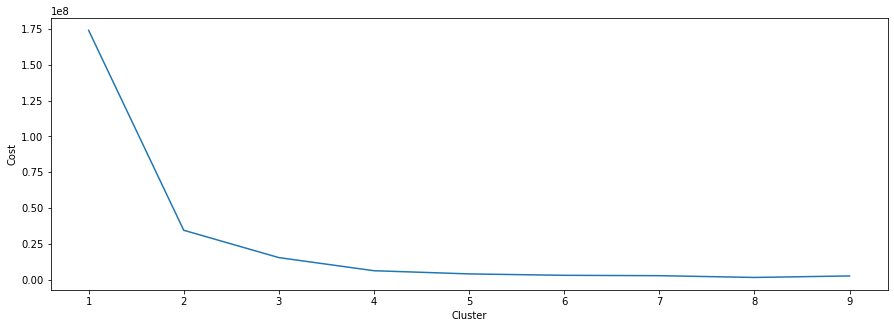

In [388]:
sns.lineplot(x=df_cost['Cluster'],y=df_cost['Cost'])

In [389]:
# Fit the cluster

kprototype = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 0)
kprototype.fit_predict(x, categorical = catColumnsPos)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint16)

In [390]:
# Cluster centorid
print(kprototype.cluster_centroids_,)
# Check the iteration of the clusters created
print(kprototype.n_iter_)
# Check the cost of the clusters created
print(kprototype.cost_)

[['37.87093495934959' '1258.2707317073475' 'graduate_plus' 'business'
  'trad' '3' 'Medium' '4' 'Jul-21']
 ['39.41804211724531' '1684.0695076835407' 'graduate_plus' 'business'
  'trad' '3' 'Medium' '4' 'Mar-22']]
3
34540045.49259759


In [399]:
df2['Cluster Labels'] = kprototype.labels_

In [400]:
df2.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,BFS_STOCK,AGE_GRP,year,Cluster Labels
0,9354,27,masters_plus,salaried_pvt,495001.000000,trad,5,High,6,Mar-22,1706.050000,20-30,22,1
1,7823,58,graduate_plus,salaried_govt,272001.000000,ulip,4,Medium,5,Dec-21,1640.620000,50-60,21,1
2,6170,52,masters_plus,salaried_govt,721101.000000,trad,5,High,5,Aug-21,1714.880000,50-60,21,1
3,9199,52,higher_secondary,business,712612.000000,trad,3,Medium,2,Mar-22,1706.050000,50-60,22,1
4,9981,34,graduate_plus,salaried_pvt,110085.000000,ulip,6,Very_high,6,Mar-22,1706.050000,30-40,22,1


In [401]:
df2.groupby(['Cluster Labels','PROD_CATEGORY'])['PROD_CATEGORY'].count()

Cluster Labels  PROD_CATEGORY
0               term              157
                trad              584
                ulip              243
1               term              293
                trad             2361
                ulip              860
Name: PROD_CATEGORY, dtype: int64

In [404]:
df2[df2['Cluster Labels']==0].mean()

ID                     5542.850610
AGE                      37.870935
PINCODE              483041.714431
INCOME_SEGMENT            3.552846
QUALITY_SCORE_BAND        4.091463
BFS_STOCK              1258.270732
year                           inf
Cluster Labels            0.000000
dtype: float64

In [407]:
df2[df2['Cluster Labels']==0].mode()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH,BFS_STOCK,AGE_GRP,year,Cluster Labels
0,5001,33.000000,graduate_plus,business,110085.000000,trad,3,Medium,4,Jul-21,1422.220000,30-40,21,0.000000
1,5002,NaN,NaN,NaN,122001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5003,NaN,NaN,NaN,201301.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5004,NaN,NaN,NaN,395007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5005,NaN,NaN,NaN,421301.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [409]:
df2[df2['Cluster Labels']==1].mean()

ID                     8046.336653
AGE                      39.418042
PINCODE              491279.865111
INCOME_SEGMENT            3.819294
QUALITY_SCORE_BAND        3.915196
BFS_STOCK              1684.069508
year                           inf
Cluster Labels            1.000000
dtype: float64

**INFERENCES:**
1. AGE is an important factor in deciding to buy the policies. People with average age of 40 buys ulip and ulip is the most purchased by the customers,followed by trad which is bought by policy holders of average age sllightly over 38. Term is least purchased.
2.Income segment plays a large role as the financially stable people tend to buy more policies.
3. Policy holders with a medium level of prosperity index band tends buy more policies and a higher number of trad policies followed by ulip purchased by all categories of people.
4. In the year of 2022 there is an increase in insurance purchase which indicates policy holders tend to purchase the policies when the market is stable in nature.